# Project Journal

**Name:** Shiming Yin

**Research Question:**  Does the increase in clean energy consumption significantly reduce traditional fossil fuel energy consumption in the US and globally? Tests will be done based on US data and global data separately to compare if the tests on the two scales of models would show similar variable impact on target response. 

**Variables:**

$Y$ : Fossil Fuel Energy Consumption (Coal, Oil, and Natural Gas Consumption)

$X_1$: Solar Energy Consumption 

$X_2$: Wind Energy Consumption

$X_3$: Hydroelectic Energy Consumption 

$X_4$: Geothermal Energy Consumption

$X_5$: Nuclear Energy Consumption


## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**

1. Load the Dataset
Import the CSV file containing nuclear energy data.

2. Filter by Time
Include only rows where the YYYYMM column is greater than or equal to 200901.

3. Exclude Yearly Totals
Remove rows where the YYYYMM column ends with "13", as these represent yearly total values.

4. Filter by Description
Retain only rows where the Description column correpsponding to commercial and residential.

5. Exclude Invalid Values
Exclude rows where the Value column contains "Not Available".

6. Convert Values to Numeric
Convert the Value column from a string to a numeric type for analysis.

7. Extract Results
Save the filtered

**Issues Encountered and Resolutions:**
Remove the old year date


In [1]:
# Load the necessary library
library(dplyr)

# Load the CSV file
file_path <- "../Consumption_Data/Petroleum consumption by sector Residential and commercial sectors.csv"  # Replace with your actual file path
data <- read.csv(file_path)

# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y1 <- YK10+YK11




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Load the CSV file
file_path <- "../Consumption_Data/Coal Consumption by sector.csv"  # Replace with your actual file path
data <- read.csv(file_path)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y2 <- YK11

In [3]:

# Load the CSV file
file_path <- "../Consumption_Data/Natural Gas Consumption by sector.csv"  # Replace with your actual file path
data <- read.csv(file_path)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("YK", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()

Y3 <- YK1+YK8


In [4]:
# Load the CSV file
file_path <- "../Consumption_Data/Renewable energy Consumption residential and commercial sectors.csv"  # Replace with your actual file path
data <- read.csv(file_path, stringsAsFactors = FALSE)


# Step 1: Filter rows where YYYYMM >= 200901, does not end with "13," and where "Value" is not "Not Available"
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only data from 200901 onwards
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    !grepl("Not Available", Value)  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = suppressWarnings(as.numeric(Value)))  # Safely convert "Value" to numeric

# Step 2: Combine Residential and Commercial sections for each energy type and time
summed_data <- filtered_data %>%
  group_by(YYYYMM, Description) %>%
  summarise(Total_Value = sum(Value, na.rm = TRUE), .groups = "drop")  # Sum Residential and Commercial sections

# Step 3: Save time-series values for each energy type as separate variables
# Create a list to store the time-series variables
energy_variables <- list()

# Loop through each unique energy type
for (energy in unique(summed_data$Description)) {
  # Filter the data for the current energy type
  energy_data <- summed_data %>%
    filter(Description == energy) %>%
    arrange(YYYYMM)  # Ensure the data is sorted by time

  # Save the time-series values as a variable
  assign(paste0("K", which(unique(summed_data$Description) == energy)),
         energy_data$Total_Value)

  # Optionally store in a list for easier reference later
  energy_variables[[energy]] <- energy_data$Total_Value
}

# Step 4: Save the filtered time vector (from 200901 onward)
time_vector <- summed_data %>%
  filter(as.numeric(YYYYMM) >= 200901) %>%
  select(YYYYMM) %>%
  distinct() %>%
  arrange(YYYYMM) %>%
  pull()


In [5]:
# Load the CSV file
file_path <- "../Consumption_Data/Nuclear Energy.csv"  # Replace with your actual file path
data <- read.csv(file_path, stringsAsFactors = FALSE)

# Filter the data
filtered_data <- data %>%
  filter(
    as.numeric(YYYYMM) >= 200901,  # Include only rows starting from 200901
    !grepl("13$", as.character(YYYYMM)),  # Exclude rows where YYYYMM ends with "13"
    Description == "Nuclear Generating Units, Net Summer Capacity",  # Filter by the required Description
    Value != "Not Available"  # Exclude rows where Value is "Not Available"
  ) %>%
  mutate(Value = as.numeric(Value))  # Convert Value column to numeric

# Save the filtered "Value" column as Y_filtered
X5 <- filtered_data %>%
  pull(Value)  # Extract the "Value" column as a vector

# Save the corresponding "YYYYMM" column as t_filtered
t_X5 <- filtered_data %>%
  pull(YYYYMM)  # Extract the "YYYYMM" column as a vector



In [6]:
# Load the necessary library
library(dplyr)

# Read the CSV file
file_path <- "../Consumption_Data/global_electricity_consumption_data.csv"  # Replace with the path to your CSV file
data <- read.csv(file_path)

# Ensure 'product', 'date', and 'value' have the correct types
data$product <- as.character(data$product)
data$date <- as.character(data$date)
data$value <- as.numeric(as.character(data$value))

# Sum up 'Coal, Peat and Manufactured Gases' values for the same date
Y1_data <- data %>%
  filter(product == "Coal, Peat and Manufactured Gases") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(Y1 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

# Extract the values as 'Y1' (vector of summed values)
Y1_global <- Y1_data$Y1


Y2_data <- data %>%
  filter(product == "Oil and Petroleum Products") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(Y2 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

# Extract the values as 'Y2' (vector of summed values)
Y2_global <- Y2_data$Y2


Y3_data <- data %>%
  filter(product == "Natural Gas") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(Y3 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

# Extract the values as 'Y3' (vector of summed values)
Y3_global <- Y3_data$Y3

# Calculate the global total
Y_global <- Y1_global + Y2_global + Y3_global



In [7]:
# Extract unique dates and store in 'time_global'
time_global <- unique(data$date)

# Ensure the dates are sorted if needed
time_global <- sort(time_global)




In [8]:
# Read the CSV file
file_path <- "../Consumption_Data/global_electricity_consumption_data.csv"  # Replace with the path to your CSV file
data <- read.csv(file_path)

# Ensure 'product', 'date', and 'value' have the correct types
data$product <- as.character(data$product)
data$date <- as.character(data$date)
data$value <- as.numeric(as.character(data$value))


X1_data <- data %>%
  filter(product == "Solar") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(X1 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

X1_global <- X1_data$X1

X2_data <- data %>%
  filter(product == "Wind") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(X2 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

X2_global <- X2_data$X2

X3_data <- data %>%
  filter(product == "Hydro") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(X3 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

X3_global <- X3_data$X3

X4_data <- data %>%
  filter(product == "Geothermal") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(X4 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

X4_global <- X4_data$X4

X5_data <- data %>%
  filter(product == "Nuclear") %>%  # Filter only this product
  group_by(date) %>%                                         # Group by date
  summarise(X5 = sum(value, na.rm = TRUE), .groups = "drop") # Sum values for each date

X5_global <- X5_data$X5




### Load US data 

In [9]:
Y  <- Y1+Y2+Y3
X1 <- K10+K11
X2 <- K12+K13
X3 <- K9
X4 <- K7+K8
X5 <- X5

# Combine all variables into a data frame
data_us <- data.frame(
  Y = Y,
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5
)


### Load Global Data

In [10]:
# Combine all variables into a data frame
data_global <- data.frame(
  Y_global = Y_global,
  X1_global = X1_global,
  X2_global = X2_global,
  X3_global = X3_global,
  X4_global = X4_global,
  X5_global = X5_global
)

### Exploratory Data Analysis Findings
**Key Visualizations:** 

Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.95 loaded



[1] "Significant Correlations (|correlation| > 0.5):"
  Variable1 Variable2 Correlation
1        X2         Y   0.5947015
2        X4         Y  -0.7815791
3        X5         Y   0.7781887
4        X4        X1   0.7147372
5        X5        X1  -0.6336816
6        X3        X2   0.5838289
7        X5        X2   0.5222030
8        X5        X4  -0.8378497


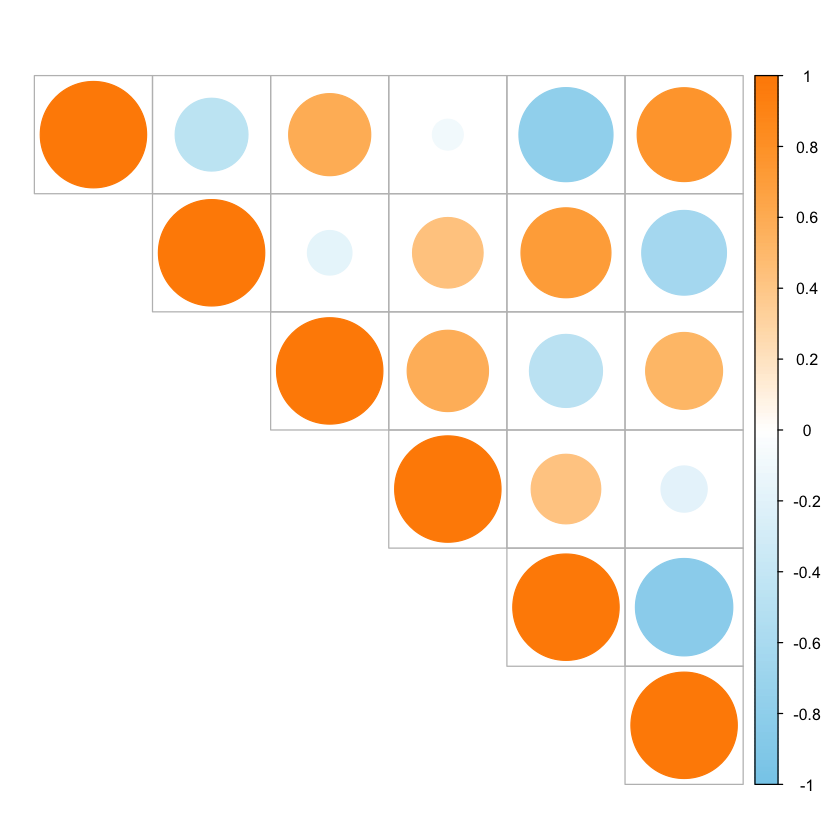

[1] "Significant Correlations (|correlation| > 0.5):"
   Variable1 Variable2 Correlation
1  X1_global  Y_global   0.6994871
2  X2_global  Y_global   0.7774065
3  X3_global  Y_global   0.9428447
4  X4_global  Y_global   0.8331099
5  X5_global  Y_global   0.7031523
6  X2_global X1_global   0.8708684
7  X3_global X1_global   0.7316508
8  X4_global X1_global   0.8010281
9  X3_global X2_global   0.7325980
10 X4_global X2_global   0.9133263
11 X5_global X2_global   0.5382382
12 X4_global X3_global   0.8041115
13 X5_global X3_global   0.5713776
14 X5_global X4_global   0.6023442


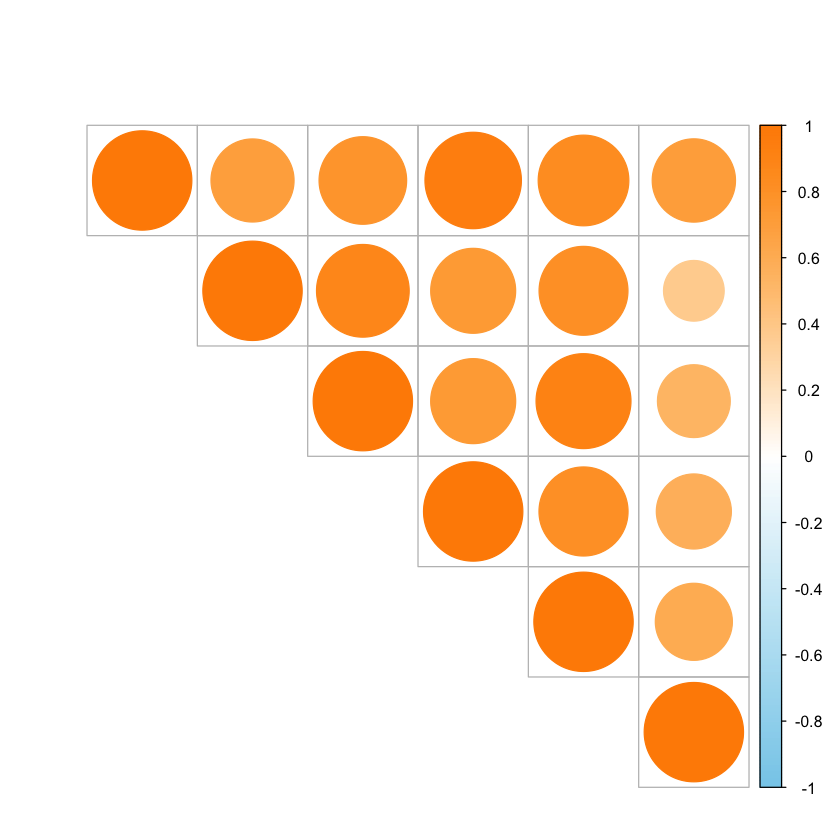

In [11]:
library(corrplot)


# Compute the correlation matrix
cor_matrix <- cor(data_us, use = "complete.obs")

# Visualize the correlation matrix using corrplot
# Plot the entire correlation matrix
corrplot(
  cor_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

# Use the lower triangle to avoid duplicate pairs
significant_pairs <- which(abs(cor_matrix) > 0.5 & lower.tri(cor_matrix, diag = FALSE), arr.ind = TRUE)

# Create a data frame of significant correlations
significant_correlations <- data.frame(
  Variable1 = rownames(cor_matrix)[significant_pairs[, 1]],
  Variable2 = colnames(cor_matrix)[significant_pairs[, 2]],
  Correlation = cor_matrix[significant_pairs]
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)



## Global data
# Compute the correlation matrix
cor_matrix <- cor(data_global, use = "complete.obs")

# Visualize the correlation matrix using corrplot
# Plot the entire correlation matrix
corrplot(
  cor_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

# Use the lower triangle to avoid duplicate pairs
significant_pairs <- which(abs(cor_matrix) > 0.5 & lower.tri(cor_matrix, diag = FALSE), arr.ind = TRUE)

# Create a data frame of significant correlations
significant_correlations <- data.frame(
  Variable1 = rownames(cor_matrix)[significant_pairs[, 1]],
  Variable2 = colnames(cor_matrix)[significant_pairs[, 2]],
  Correlation = cor_matrix[significant_pairs]
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




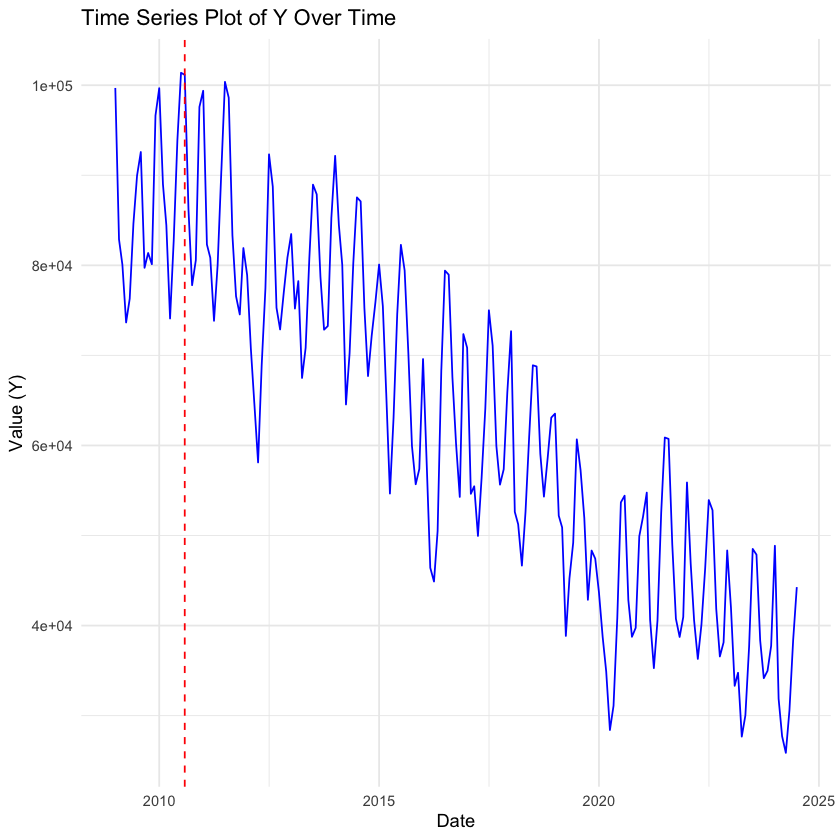

In [12]:
library(ggplot2)
library(lubridate)

# Combine the time and value into a data frame
time_series_data <- data.frame(
  Date = as.Date(paste0(time_vector, "01"), format = "%Y%m%d"),  # Convert YYYYMM to Date
  Value = Y  # Use Y as the value to be plotted
)

# Create a time series plot
ggplot(time_series_data, aes(x = Date, y = Value)) +
  geom_line(color = "blue") +  # Line plot of the time series
  geom_vline(xintercept = as.Date("2010-08-01"), linetype = "dashed", color = "red") +  # Example event date
  labs(title = "Time Series Plot of Y Over Time",
       y = "Value (Y)",
       x = "Date") +
  theme_minimal()

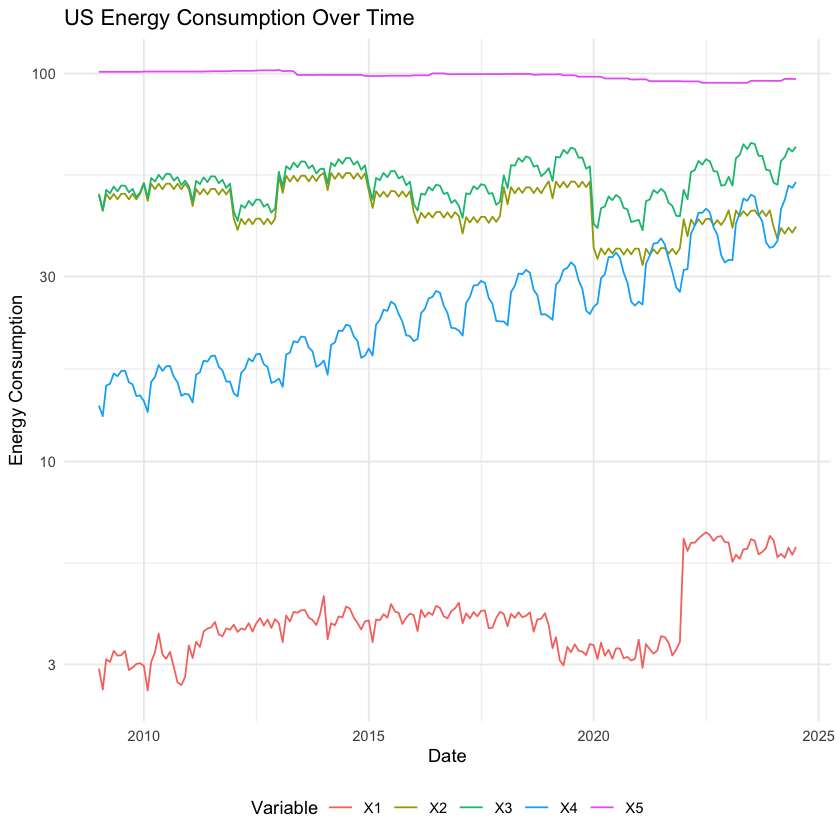

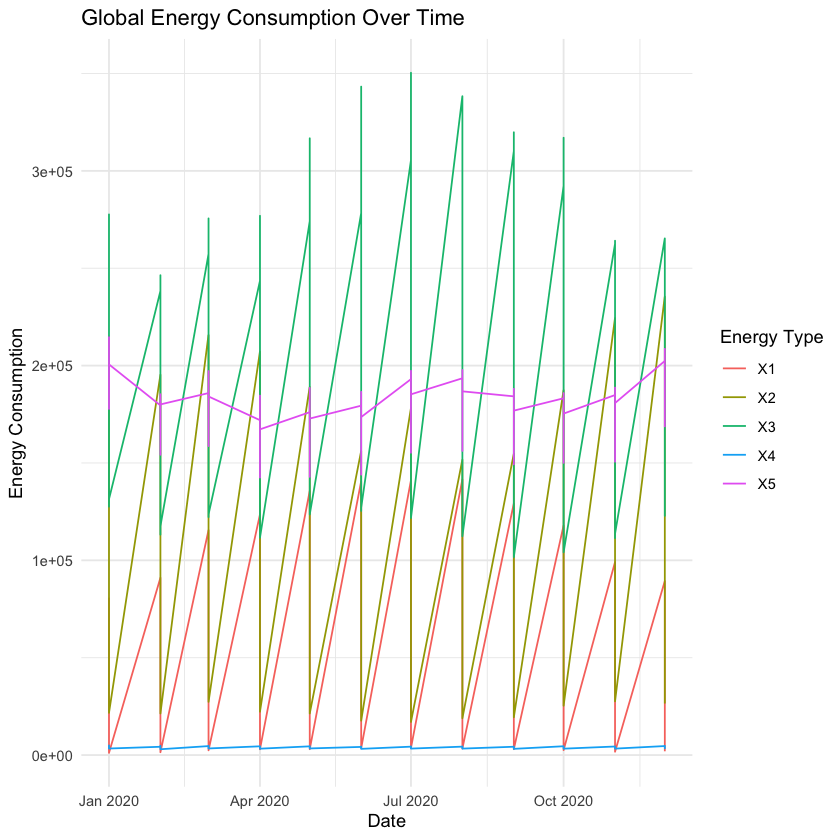

In [13]:
library(tidyr)
# Combine the time and all variables (X1, X2, ..., X7) into a long format for ggplot
time_series_data <- data.frame(
  Date = as.Date(paste0(time_vector, "01"), format = "%Y%m%d"),  # Convert YYYYMM to Date
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5
) %>%
  pivot_longer(cols = starts_with("X"), names_to = "Variable", values_to = "Value")  # Convert to long format

# Plot all time series in one figure
ggplot(time_series_data, aes(x = Date, y = Value, color = Variable)) +
  geom_line() +  # Line plot for each variable
  scale_y_log10() +  # Apply log scale to y-axis
  labs(title = "US Energy Consumption Over Time",
       y = "Energy Consumption",
       x = "Date",
       color = "Variable") +  # Add legend for variables
  theme_minimal() +
  theme(legend.position = "bottom")  # Move legend to bottom


# Global
# Combine all data into a single data frame
combined_data <- data.frame(
  date = unique(data$date),  # Ensure all unique dates are included
  X1 = X1_data$X1[match(unique(data$date), X1_data$date)],
  X2 = X2_data$X2[match(unique(data$date), X2_data$date)],
  X3 = X3_data$X3[match(unique(data$date), X3_data$date)],
  X4 = X4_data$X4[match(unique(data$date), X4_data$date)],
  X5 = X5_data$X5[match(unique(data$date), X5_data$date)]
)

# Ensure 'date' is in Date format
combined_data$date <- as.Date(combined_data$date, format = "%m/%d/%y")

# Convert to long format for easier plotting with ggplot2
library(tidyr)
long_data <- combined_data %>%
  pivot_longer(cols = starts_with("X"), names_to = "Variable", values_to = "Value")

# Plot using ggplot2
library(ggplot2)
ggplot(long_data, aes(x = date, y = Value, color = Variable)) +
  geom_line() +
  labs(
    title = "Global Energy Consumption Over Time",
    x = "Date",
    y = "Energy Consumption",
    color = "Energy Type"
  ) +
  theme_minimal()




`geom_smooth()` using formula = 'y ~ x'


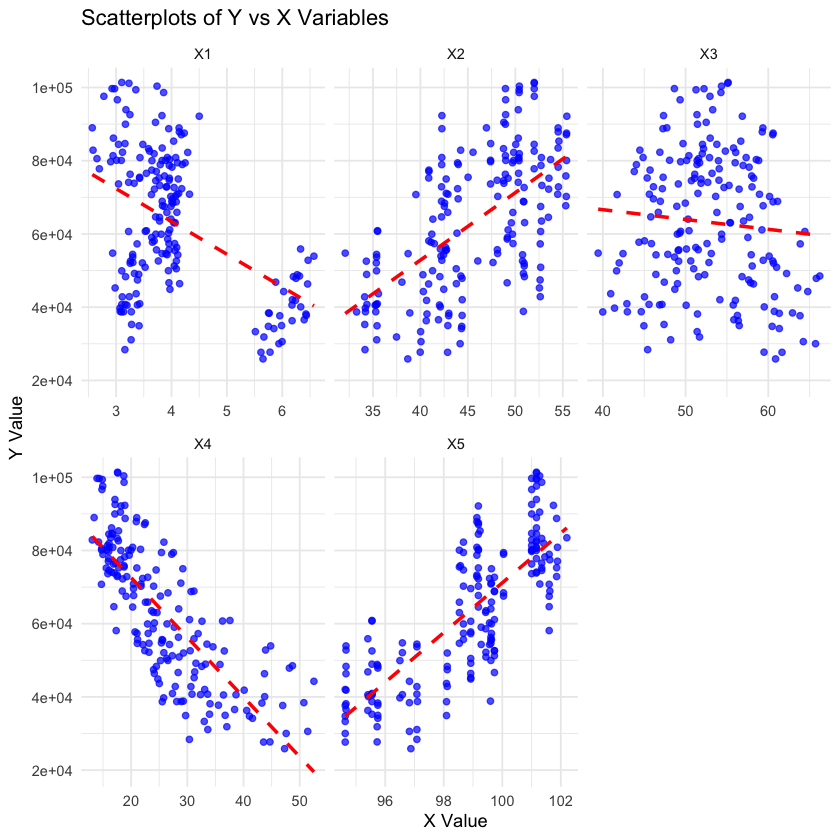

In [14]:
# Combine Y and all X variables into a long format for ggplot
scatter_data <- data.frame(
  Y = Y,
  X1 = X1,
  X2 = X2,
  X3 = X3,
  X4 = X4,
  X5 = X5
) %>%
  pivot_longer(cols = starts_with("X"), names_to = "Variable", values_to = "X_Value")  # Convert to long format

# Create scatterplots of each X variable against Y
ggplot(scatter_data, aes(x = X_Value, y = Y)) +
  geom_point(alpha = 0.7, color = "blue") +  # Scatterplot points
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +  # Add regression line
  facet_wrap(~Variable, scales = "free_x") +  # Create a separate plot for each X variable
  labs(title = "Scatterplots of Y vs X Variables",
       x = "X Value",
       y = "Y Value") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


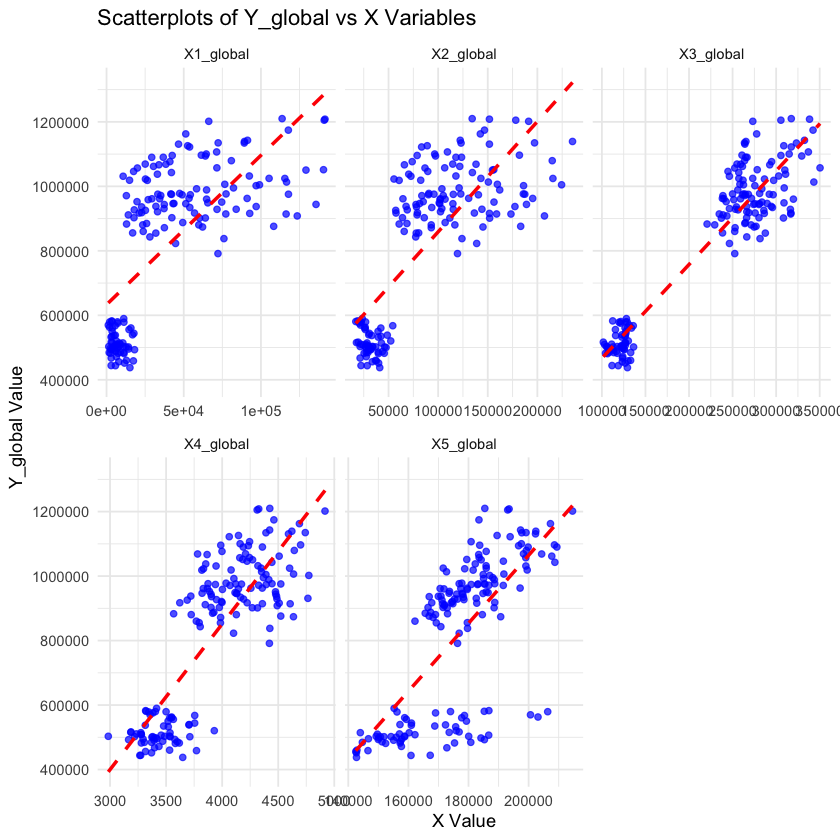

In [15]:

# Combine Y_global and all X_global variables into a long format for ggplot
scatter_data_global <- data.frame(
  Y_global = Y_global,  # Dependent variable
  X1_global = X1_global,
  X2_global = X2_global,
  X3_global = X3_global,
  X4_global = X4_global,
  X5_global = X5_global
) %>%
  pivot_longer(
    cols = starts_with("X"),  # Select all columns starting with "X"
    names_to = "Variable",    # New column for variable names
    values_to = "X_Value"     # New column for corresponding values
  )  # Convert to long format

# Create scatterplots of each X variable against Y_global
ggplot(scatter_data_global, aes(x = X_Value, y = Y_global)) +
  geom_point(alpha = 0.7, color = "blue") +  # Scatterplot points
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +  # Add regression line
  facet_wrap(~Variable, scales = "free_x") +  # Create a separate plot for each X variable
  labs(
    title = "Scatterplots of Y_global vs X Variables",
    x = "X Value",
    y = "Y_global Value"
  ) +
  theme_minimal()


### Summary Statistics

In [16]:
library(dplyr)
library(knitr)

# Calculate summary statistics for each variable
summary_stats <- data %>%
  summarise(
    Y_mean = mean(Y, na.rm = TRUE),
    Y_sd = sd(Y, na.rm = TRUE),
    X1_mean = mean(X1, na.rm = TRUE),
    X1_sd = sd(X1, na.rm = TRUE),
    X2_mean = mean(X2, na.rm = TRUE),
    X2_sd = sd(X2, na.rm = TRUE),
    X3_mean = mean(X3, na.rm = TRUE),
    X3_sd = sd(X3, na.rm = TRUE),
    X4_mean = mean(X4, na.rm = TRUE),
    X4_sd = sd(X4, na.rm = TRUE),
    X5_mean = mean(X5, na.rm = TRUE),
    X5_sd = sd(X5, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats, caption = "Summary Statistics for Y and X Variables", digits = 2)

Warning message:
"package 'knitr' was built under R version 4.3.3"




Table: Summary Statistics for Y and X Variables

|Statistic |    Value|
|:---------|--------:|
|Y_mean    | 63179.04|
|Y_sd      | 19157.48|
|X1_mean   |     4.03|
|X1_sd     |     1.00|
|X2_mean   |    45.61|
|X2_sd     |     6.19|
|X3_mean   |    52.86|
|X3_sd     |     5.99|
|X4_mean   |    25.76|
|X4_sd     |     9.18|
|X5_mean   |    98.82|
|X5_sd     |     2.19|

In [17]:
# Load necessary library
library(dplyr)
library(knitr)  # For kable

# Combine global data into a data frame
global_data <- data.frame(
  Y_global = Y_global,
  X1_global = X1_global,
  X2_global = X2_global,
  X3_global = X3_global,
  X4_global = X4_global,
  X5_global = X5_global
)

# Calculate summary statistics for each global variable
summary_stats_global <- global_data %>%
  summarise(
    Y_global_mean = mean(Y_global, na.rm = TRUE),
    Y_global_sd = sd(Y_global, na.rm = TRUE),
    X1_global_mean = mean(X1_global, na.rm = TRUE),
    X1_global_sd = sd(X1_global, na.rm = TRUE),
    X2_global_mean = mean(X2_global, na.rm = TRUE),
    X2_global_sd = sd(X2_global, na.rm = TRUE),
    X3_global_mean = mean(X3_global, na.rm = TRUE),
    X3_global_sd = sd(X3_global, na.rm = TRUE),
    X4_global_mean = mean(X4_global, na.rm = TRUE),
    X4_global_sd = sd(X4_global, na.rm = TRUE),
    X5_global_mean = mean(X5_global, na.rm = TRUE),
    X5_global_sd = sd(X5_global, na.rm = TRUE)
  ) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Statistic",
    values_to = "Value"
  )  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats_global, caption = "Summary Statistics for Global Variables (Y and X)", digits = 2)




Table: Summary Statistics for Global Variables (Y and X)

|Statistic      |     Value|
|:--------------|---------:|
|Y_global_mean  | 819839.03|
|Y_global_sd    | 242365.63|
|X1_global_mean |  40329.13|
|X1_global_sd   |  36610.78|
|X2_global_mean |  88589.11|
|X2_global_sd   |  55067.84|
|X3_global_mean | 221421.91|
|X3_global_sd   |  78594.81|
|X4_global_mean |   3930.13|
|X4_global_sd   |    447.13|
|X5_global_mean | 176789.23|
|X5_global_sd   |  16167.89|

***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \epsilon 
\newline$$

$$Y_{global} = \beta_{0,global} +  \beta_{1,global}X_{1,global} + \beta_{2,global}X_{2,global} + \beta_{3,global}X_{3,global} + \beta_{4,global}X_{4,global} + \beta_{5,global}X_{5,global} + \epsilon 
\newline $$


### Model Fitting

X variables need to be scaled to make beta comparable

In [18]:
# Scale the predictors (X1 to X5) and the dependent variable (Y)
scaled_data <- data_us %>%
  mutate(across(c(Y, X1, X2, X3, X4, X5), scale))  # Scale all variables
# Build the scaled linear regression model
scaled_model <- lm(Y ~ X1 + X2 + X3 + X4 + X5, data = scaled_data)
# Summarize the scaled model
summary(scaled_model)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5, data = scaled_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2207 -0.3922 -0.0624  0.3666  1.3945 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.035e-14  3.917e-02   0.000 1.000000    
X1           1.730e-01  6.069e-02   2.851 0.004868 ** 
X2          -4.956e-01  3.042e-01  -1.629 0.105000    
X3           7.039e-01  3.015e-01   2.335 0.020640 *  
X4          -1.235e+00  3.260e-01  -3.789 0.000206 ***
X5           2.441e-01  8.667e-02   2.817 0.005394 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5357 on 181 degrees of freedom
Multiple R-squared:  0.7208,	Adjusted R-squared:  0.7131 
F-statistic: 93.44 on 5 and 181 DF,  p-value: < 2.2e-16


In [19]:
# Scale the predictors (X1 to X5) and the dependent variable (Y)
scaled_data_global <- data_global %>%
  mutate(across(c(Y_global, X1_global, X2_global, X3_global, X4_global, X5_global), scale))  # Scale all variables
# Build the scaled linear regression model
scaled_model_global <- lm(Y_global ~ X1_global + X2_global + X3_global + X4_global + X5_global, data = scaled_data_global)
# Summarize the scaled model
summary(scaled_model_global)


Call:
lm(formula = Y_global ~ X1_global + X2_global + X3_global + X4_global + 
    X5_global, data = scaled_data_global)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65603 -0.14722  0.01951  0.15020  0.64145 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.413e-15  1.926e-02   0.000 1.000000    
X1_global   -1.226e-01  4.374e-02  -2.804 0.005669 ** 
X2_global    2.249e-01  5.974e-02   3.764 0.000234 ***
X3_global    7.556e-01  3.558e-02  21.237  < 2e-16 ***
X4_global    3.573e-04  5.564e-02   0.006 0.994885    
X5_global    1.960e-01  2.610e-02   7.510 3.74e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2497 on 162 degrees of freedom
Multiple R-squared:  0.9395,	Adjusted R-squared:  0.9377 
F-statistic: 503.3 on 5 and 162 DF,  p-value: < 2.2e-16


### Multicollinearity
**Explanation of Multicollinearity:**
[Briefly describe any collinearity included in the model] 

In [20]:
library(car)


# VIF for the scaled data
vif_scaled_model <- vif(scaled_model)
print("VIF - Scaled data:")
print(vif_scaled_model)

# VIF for the scaled data
vif_scaled_model_global <- vif(scaled_model_global)
print("VIF - Scaled data:")
print(vif_scaled_model_global)

Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




[1] "VIF - Scaled data:"
       X1        X2        X3        X4        X5 
 2.387245 59.987901 58.912075 68.896170  4.868753 
[1] "VIF - Scaled data:"
X1_global X2_global X3_global X4_global X5_global 
 5.123648  9.559233  3.390383  8.293481  1.824223 


**Conclusions**

***Multicollinearity for US data***

X2, X3, X4 have extreme multicollinearity. This can inflate the standard errors of their coefficients, making the model unstable and difficult to interpret.
Due to the high VIF values, it is difficult to interpret the unique contribution of variables like X2, X3, X4 to the dependent variable (Y).

***Multicollinearity for Global data***

X2_global and X4_global have high VIF values (close to or above 8). These variables might be highly correlated with others and could affect model stability. X1_global has a moderate VIF value (~5), which is worth monitoring but not critical. X3_global and X5_global exhibit acceptable multicollinearity and are unlikely to pose issues. Thus, addressing X2_global and X4_global is recommended to improve model robustness.







### Interaction Terms
**Explanation of Interaction Terms:**



In [21]:
# Scale the data (if not already scaled)
scaled_data <- data_us %>%
  mutate(across(c(Y, X1, X2, X3, X4, X5), scale))  # Scale all variables

# Create an interaction model with X5 as the interacting variable
interaction_model_scaled <- lm(Y ~ 
                               X1 * X5 + 
                               X2 * X5 + 
                               X3 * X5 + 
                               X4 * X5,
                               data = scaled_data)

# Summarize the scaled interaction model to assess its fit
summary(interaction_model_scaled)



Call:
lm(formula = Y ~ X1 * X5 + X2 * X5 + X3 * X5 + X4 * X5, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16394 -0.37977 -0.08984  0.40549  1.06952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.22988    0.06768  -3.397 0.000843 ***
X1           0.17731    0.09263   1.914 0.057204 .  
X5           0.39700    0.09523   4.169 4.78e-05 ***
X2           0.55984    0.42377   1.321 0.188181    
X3          -0.27992    0.40150  -0.697 0.486591    
X4          -0.28956    0.42717  -0.678 0.498737    
X1:X5        0.14878    0.08192   1.816 0.071025 .  
X5:X2       -0.05178    0.36750  -0.141 0.888110    
X5:X3        0.18787    0.35032   0.536 0.592443    
X5:X4       -0.46285    0.37428  -1.237 0.217861    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5108 on 177 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7391 
F-statistic: 59.53 on 9 and 177

In [22]:
# Scale the data (if not already scaled)
scaled_data_global <- data_global %>%
  mutate(across(c(Y_global, X1_global, X2_global, X3_global, X4_global, X5_global), scale))  # Scale all variables

# Create an interaction model with X5 as the interacting variable
interaction_model_scaled_global <- lm(Y_global ~ 
                               X1_global * X5_global + 
                               X2_global * X5_global + 
                               X3_global * X5_global + 
                               X4_global * X5_global,
                               data = scaled_data_global)

# Summarize the scaled interaction model to assess its fit
summary(interaction_model_scaled_global)



Call:
lm(formula = Y_global ~ X1_global * X5_global + X2_global * X5_global + 
    X3_global * X5_global + X4_global * X5_global, data = scaled_data_global)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70060 -0.14246 -0.01293  0.16241  0.61470 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.069635   0.022586  -3.083  0.00242 ** 
X1_global           -0.089287   0.052612  -1.697  0.09165 .  
X5_global            0.236177   0.026981   8.753 2.98e-15 ***
X2_global            0.201254   0.067034   3.002  0.00312 ** 
X3_global            0.810145   0.035433  22.864  < 2e-16 ***
X4_global           -0.067825   0.056642  -1.197  0.23294    
X1_global:X5_global -0.046197   0.059837  -0.772  0.44124    
X5_global:X2_global  0.077266   0.064437   1.199  0.23229    
X5_global:X3_global  0.074550   0.044928   1.659  0.09904 .  
X5_global:X4_global  0.005182   0.051673   0.100  0.92024    
---
Signif. codes:  0 '***' 0.001 '**' 0.


***Strong Interactions: US data***

The model demonstrates a interaction effect X1:X5. This suggests that the relationship between X1 predictor and Y is strongly dependent on the level of X5.

***Strong Interactions: Global data***

Most interaction terms with X5_global are not significant, except for a marginal interaction with X3_global

In [23]:
# VIF for the scaled data
vif_interaction_model_scaled <- vif(interaction_model_scaled)
print("VIF - Scaled interaction data:")
print(vif_interaction_model_scaled)

# VIF for the scaled data global
vif_interaction_model_scaled_global <- vif(interaction_model_scaled_global)
print("VIF - Scaled interaction data global:")
print(vif_interaction_model_scaled_global)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



[1] "VIF - Scaled interaction data:"
        X1         X5         X2         X3         X4      X1:X5      X5:X2 
  6.115505   6.463611 128.007309 114.903277 130.065526   8.458543  63.317870 
     X5:X3      X5:X4 
 92.143309 104.399596 


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



[1] "VIF - Scaled interaction data global:"
          X1_global           X5_global           X2_global           X3_global 
           8.467571            2.226992           13.746369            3.840763 
          X4_global X1_global:X5_global X5_global:X2_global X5_global:X3_global 
           9.814706            6.452853           11.374249            5.009442 
X5_global:X4_global 
           7.941269 


In [24]:

# AIC and BIC for Interaction Model (with interactions)
aic_interaction <- AIC(interaction_model_scaled)
bic_interaction <- BIC(interaction_model_scaled)

cat("AIC - Interaction Model:", aic_interaction, "\n")
cat("BIC - Interaction Model:", bic_interaction, "\n")


# AIC and BIC for Interaction Model (with interactions) using global data
aic_global_interaction <- AIC(interaction_model_scaled_global)
bic_global_interaction <- BIC(interaction_model_scaled_global)


cat("AIC - Global Interaction Model:", aic_global_interaction, "\n")
cat("BIC - Global Interaction Model:", bic_global_interaction, "\n")



AIC - Interaction Model: 291.1794 
BIC - Interaction Model: 326.7216 
AIC - Global Interaction Model: -0.07063657 
BIC - Global Interaction Model: 34.29297 


For interaction Model:

AIC: 291.1794, BIC: 326.7216. These higher values indicate a less optimal fit compared to the global interaction model.

For Global Interaction Model:

AIC: -0.0706, BIC: 34.29297. The much lower AIC and BIC suggest the global interaction model provides a significantly better fit while effectively penalizing for model complexity.

The Global Interaction Model is preferred over the standard Interaction Model based on its lower AIC and BIC values, indicating it is more parsimonious and explains the data better.






### Model Summary and Diagonostics

#### 1. Model Summary and ANOVA

In [25]:
# Model summary
summary(interaction_model_scaled)

# ANOVA table
anova(interaction_model_scaled)



Call:
lm(formula = Y ~ X1 * X5 + X2 * X5 + X3 * X5 + X4 * X5, data = scaled_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16394 -0.37977 -0.08984  0.40549  1.06952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.22988    0.06768  -3.397 0.000843 ***
X1           0.17731    0.09263   1.914 0.057204 .  
X5           0.39700    0.09523   4.169 4.78e-05 ***
X2           0.55984    0.42377   1.321 0.188181    
X3          -0.27992    0.40150  -0.697 0.486591    
X4          -0.28956    0.42717  -0.678 0.498737    
X1:X5        0.14878    0.08192   1.816 0.071025 .  
X5:X2       -0.05178    0.36750  -0.141 0.888110    
X5:X3        0.18787    0.35032   0.536 0.592443    
X5:X4       -0.46285    0.37428  -1.237 0.217861    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5108 on 177 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7391 
F-statistic: 59.53 on 9 and 177

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,40.8099605,40.8099605,156.3945968,4.006876e-26
X5,1,72.0173168,72.0173168,275.9894661,5.824147e-38
X2,1,8.9618979,8.9618979,34.3443706,2.208751e-08
X3,1,8.1535672,8.1535672,31.2466327,8.470393e-08
X4,1,4.1201441,4.1201441,15.7894855,1.029329e-04
X1:X5,1,0.2482624,0.2482624,0.9514073,3.306925e-01
X5:X2,1,3.0837207,3.0837207,11.8176360,7.313816e-04
X5:X3,1,2.0192997,2.0192997,7.7384921,5.991648e-03
X5:X4,1,0.3990495,0.3990495,1.5292637,2.178613e-01


In [26]:
# Model summary
summary(interaction_model_scaled_global)

# ANOVA table
anova(interaction_model_scaled_global)


Call:
lm(formula = Y_global ~ X1_global * X5_global + X2_global * X5_global + 
    X3_global * X5_global + X4_global * X5_global, data = scaled_data_global)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70060 -0.14246 -0.01293  0.16241  0.61470 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.069635   0.022586  -3.083  0.00242 ** 
X1_global           -0.089287   0.052612  -1.697  0.09165 .  
X5_global            0.236177   0.026981   8.753 2.98e-15 ***
X2_global            0.201254   0.067034   3.002  0.00312 ** 
X3_global            0.810145   0.035433  22.864  < 2e-16 ***
X4_global           -0.067825   0.056642  -1.197  0.23294    
X1_global:X5_global -0.046197   0.059837  -0.772  0.44124    
X5_global:X2_global  0.077266   0.064437   1.199  0.23229    
X5_global:X3_global  0.074550   0.044928   1.659  0.09904 .  
X5_global:X4_global  0.005182   0.051673   0.100  0.92024    
---
Signif. codes:  0 '***' 0.001 '**' 0.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1_global,1,8.171013e+01,8.171013e+01,1.496761e+03,1.726809e-82
X5_global,1,3.789851e+01,3.789851e+01,6.942226e+02,1.061829e-59
X2_global,1,3.064190e+00,3.064190e+00,5.612965e+01,4.526615e-12
X3_global,1,3.422677e+01,3.422677e+01,6.269639e+02,7.093037e-57
X4_global,1,2.570551e-06,2.570551e-06,4.708721e-05,9.945336e-01
X1_global:X5_global,1,9.319197e-01,9.319197e-01,1.707085e+01,5.823054e-05
X5_global:X2_global,1,3.602943e-01,3.602943e-01,6.599850e+00,1.112418e-02
X5_global:X3_global,1,1.822136e-01,1.822136e-01,3.337777e+00,6.959306e-02
X5_global:X4_global,1,5.490743e-04,5.490743e-04,1.005791e-02,9.202419e-01


#### 2. Residual plot

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


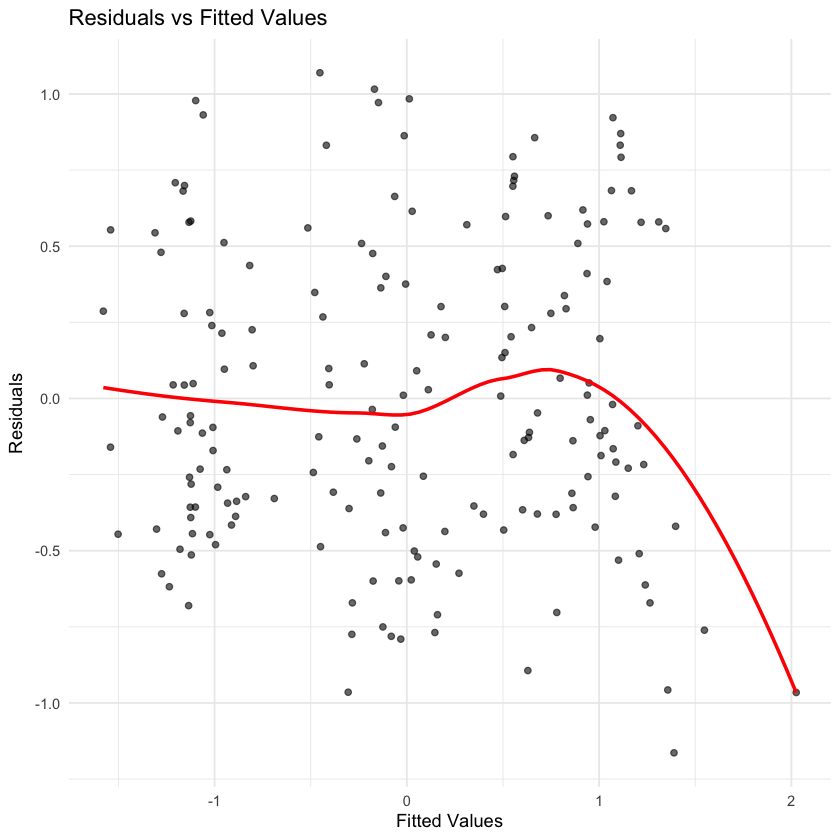

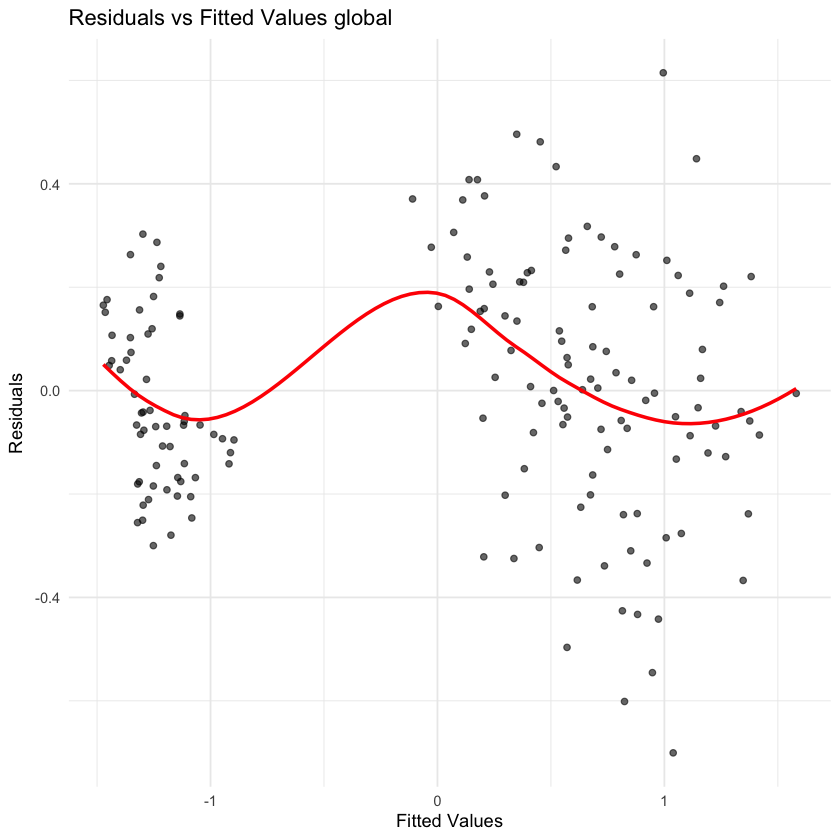

In [27]:

# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(interaction_model_scaled), Residuals = residuals(interaction_model_scaled)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6) +  # Scatter plot of residuals
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # LOESS smoothing line
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(interaction_model_scaled_global), Residuals = residuals(interaction_model_scaled_global)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6) +  # Scatter plot of residuals
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # LOESS smoothing line
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values global") +
  theme_minimal()

#### 3. Q-Q plot

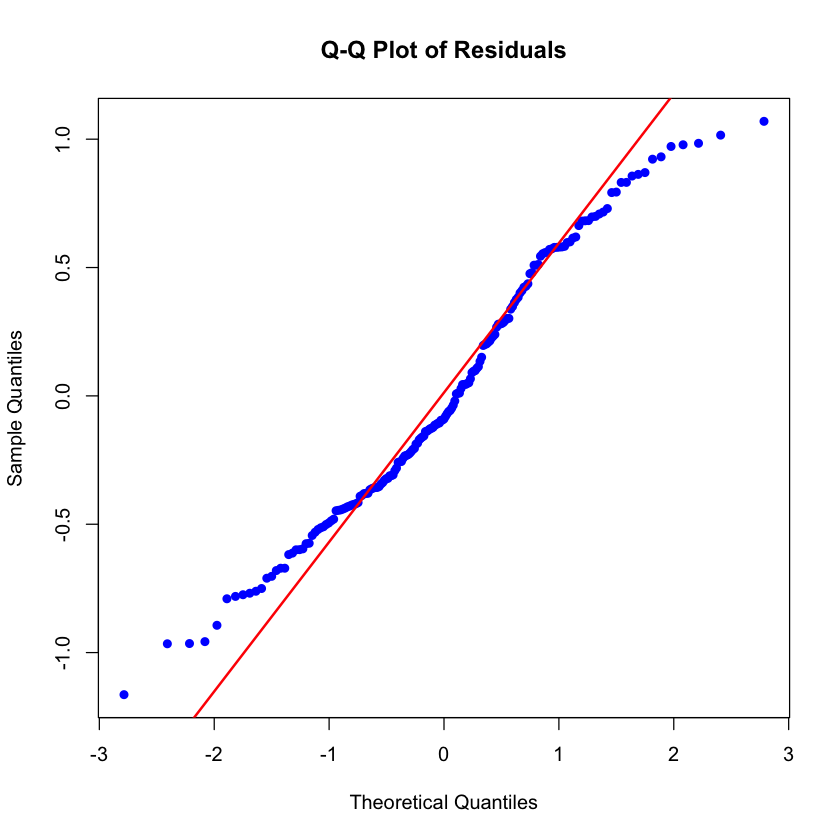

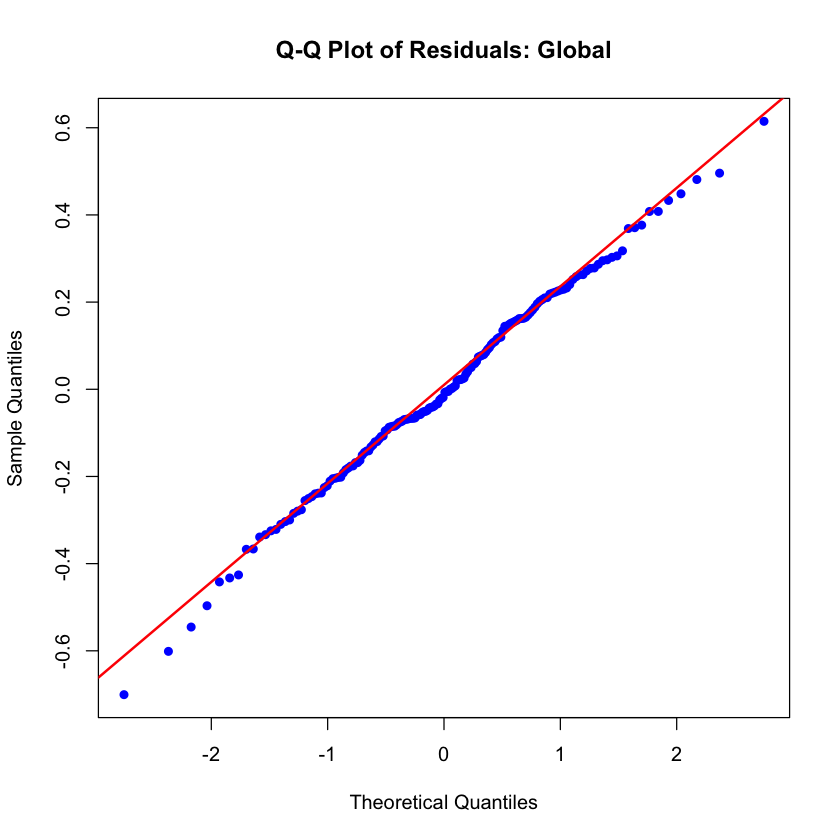

In [28]:
# Q-Q Plot 
qqnorm(residuals(interaction_model_scaled), 
       main = "Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(interaction_model_scaled), 
       col = "red", lwd = 2)  # Use a thicker red line

# Q-Q Plot 
qqnorm(residuals(interaction_model_scaled_global), 
       main = "Q-Q Plot of Residuals: Global", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(interaction_model_scaled_global), 
       col = "red", lwd = 2)  # Use a thicker red line


#### 4.Cook's Distance

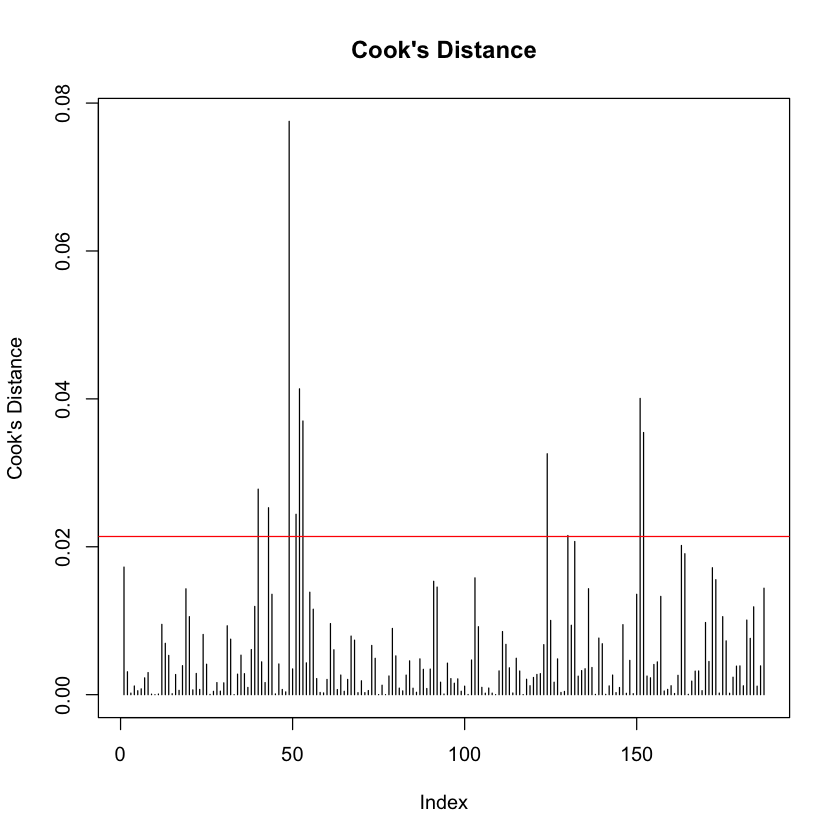

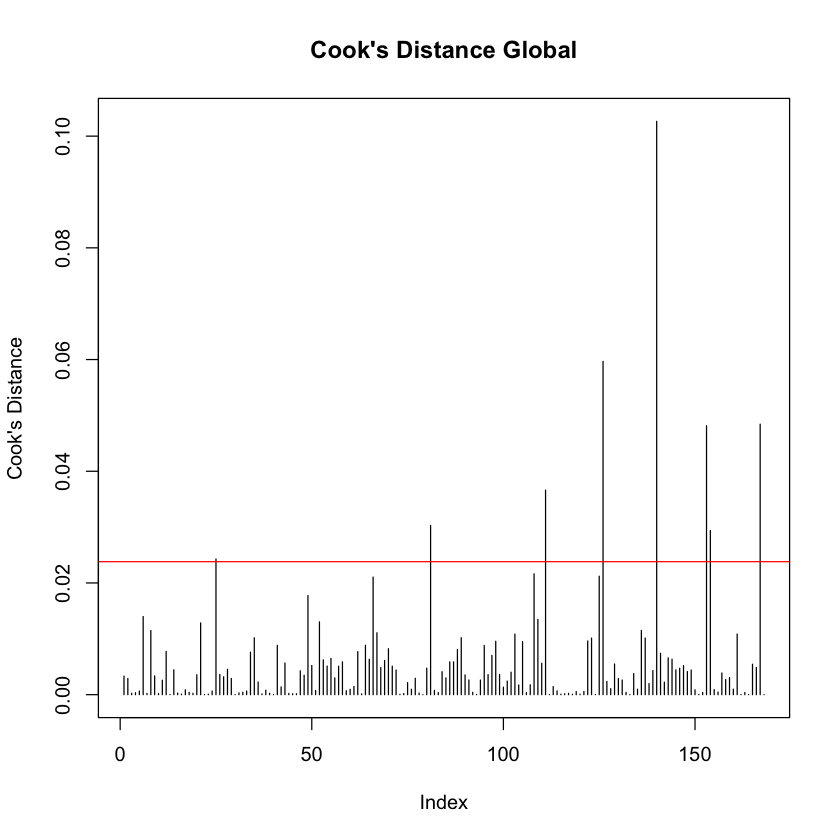

In [29]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(interaction_model_scaled)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points


# Cook's Distance plot (influential points)
cooksd <- cooks.distance(interaction_model_scaled_global)
plot(cooksd, type = "h", main = "Cook's Distance Global", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points


### Feature Selection Plan

1. Use correlation analysis reuslt to identify and combine highly correlated predictors.
2. Use VIF results to address multicollinearity.
3. Use Recursive Feature Elimination (RFE) or Stepwise Regression for feature selection.
4. Assess predictor importance to prioritize key variables.
5. Validate the final model on a testing set to ensure generalizability.

In [30]:
cor_matrix <- cor(data_us[, c("X1", "X2", "X3", "X4", "X5")])
print(cor_matrix)

vif_values <- vif(interaction_model_scaled)
print(vif_values)

cor_matrix_global <- cor(data_global[, c("X1_global", "X2_global", "X3_global", "X4_global", "X5_global")])
print(cor_matrix_global)

vif_values_global <- vif(interaction_model_scaled_global)
print(vif_values_global)


           X1         X2         X3         X4         X5
X1  1.0000000 -0.1748124  0.4398016  0.7147372 -0.6336816
X2 -0.1748124  1.0000000  0.5838289 -0.4712233  0.5222030
X3  0.4398016  0.5838289  1.0000000  0.4277448 -0.1882479
X4  0.7147372 -0.4712233  0.4277448  1.0000000 -0.8378497
X5 -0.6336816  0.5222030 -0.1882479 -0.8378497  1.0000000


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



        X1         X5         X2         X3         X4      X1:X5      X5:X2 
  6.115505   6.463611 128.007309 114.903277 130.065526   8.458543  63.317870 
     X5:X3      X5:X4 
 92.143309 104.399596 
          X1_global X2_global X3_global X4_global X5_global
X1_global 1.0000000 0.8708684 0.7316508 0.8010281 0.3734805
X2_global 0.8708684 1.0000000 0.7325980 0.9133263 0.5382382
X3_global 0.7316508 0.7325980 1.0000000 0.8041115 0.5713776
X4_global 0.8010281 0.9133263 0.8041115 1.0000000 0.6023442
X5_global 0.3734805 0.5382382 0.5713776 0.6023442 1.0000000


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



          X1_global           X5_global           X2_global           X3_global 
           8.467571            2.226992           13.746369            3.840763 
          X4_global X1_global:X5_global X5_global:X2_global X5_global:X3_global 
           9.814706            6.452853           11.374249            5.009442 
X5_global:X4_global 
           7.941269 


In [31]:
library(caret)

Loading required package: lattice



In [32]:
model <- train(Y ~ X1 + X2 + X3 + X4 + X5 , data = scaled_data, method = "lm")
var_importance <- varImp(model)
print(var_importance)


model_global <- train(Y_global ~ X1_global + X2_global + X3_global + X4_global + X5_global , data = scaled_data_global, method = "lm")
var_importance_global <- varImp(model_global)
print(var_importance_global)

lm variable importance

   Overall
X4  100.00
X1   56.55
X5   54.97
X3   32.67
X2    0.00
lm variable importance

          Overall
X3_global  100.00
X5_global   35.35
X2_global   17.70
X1_global   13.18
X4_global    0.00


***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments

Remove X2, X3 in US data;

Remove X2_global, X4_global in Global data;

Apply WLS;

1. US data final model

In [33]:
# Step 1: Split data into training and testing sets
set.seed(123)
train_indices <- createDataPartition(scaled_data$Y, p = 0.7, list = FALSE)
train_data <- scaled_data[train_indices, ]
test_data <- scaled_data[-train_indices, ]

# Step 2: Fit an initial OLS model
ols_model_US <- lm(Y ~ X1 + X5 + X4 + X1 * X5, data = train_data)

# Step 3: Calculate residuals and estimate weights
residuals_ols <- residuals(ols_model_US)
weights <- 1 / (residuals_ols^2 + 1e-6)  # Adding a small constant to avoid division by zero

# Step 4: Fit the WLS model with the calculated weights
wls_model_US <- lm(Y ~ X1 + X5 + X4 + X1 * X5, data = train_data, weights = weights)

# Step 5: Make predictions on the test data
test_predictions <- predict(wls_model_US, newdata = test_data)

# Step 6: Calculate Mean Squared Error (MSE) on the test set
mse <- mean((test_data$Y - test_predictions)^2)
print(paste("Test MSE (WLS):", mse))




[1] "Test MSE (WLS): 0.317243131764197"


In [34]:
summary(wls_model_US)


Call:
lm(formula = Y ~ X1 + X5 + X4 + X1 * X5, data = train_data, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.6661 -1.0121 -0.6605  0.9720  1.8194 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.06349    0.01084  -5.855 3.84e-08 ***
X1           0.13620    0.02314   5.885 3.33e-08 ***
X5           0.40648    0.01227  33.128  < 2e-16 ***
X4          -0.62371    0.01081 -57.682  < 2e-16 ***
X1:X5       -0.10484    0.01465  -7.155 5.91e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9941 on 127 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9925 
F-statistic:  4345 on 4 and 127 DF,  p-value: < 2.2e-16


In [35]:
anova(wls_model_US)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,9478.67244,9478.6724388,9592.13553,1.695025e-121
X5,1,4407.23780,4407.2378018,4459.99401,8.703256e-101
X4,1,3237.43404,3237.4340428,3276.18728,1.493125e-92
X1:X5,1,50.59143,50.5914272,51.19702,5.907174e-11
Residuals,127,125.49775,0.9881712,NA,NA


2. Global data final model

In [36]:
# Step 1: Split data into training and testing sets for global data
set.seed(123)
train_indices <- createDataPartition(scaled_data_global$Y_global, p = 0.7, list = FALSE)
train_data_global <- scaled_data_global[train_indices, ]
test_data_global <- scaled_data_global[-train_indices, ]

# Step 2: Fit an initial OLS model for global data
ols_model_global <- lm(Y_global ~ X1_global + X5_global + X4_global + X1_global * X5_global, data = train_data_global)

# Step 3: Calculate residuals and estimate weights
residuals_ols_global <- residuals(ols_model_global)
weights_global <- 1 / (residuals_ols_global^2 + 1e-6)  # Adding a small constant to avoid division by zero

# Step 4: Fit the WLS model with the calculated weights for global data
wls_model_global <- lm(Y_global ~ X1_global + X5_global + X3_global + X3_global * X5_global, 
                       data = train_data_global, weights = weights_global)

# Step 5: Make predictions on the test data
test_predictions_global <- predict(wls_model_global, newdata = test_data_global)

# Step 6: Calculate Mean Squared Error (MSE) on the test set
mse_global <- mean((test_data_global$Y_global - test_predictions_global)^2)
print(paste("Test MSE (WLS, Global):", mse_global))


cat("\nWLS Model Summary (Global Data):\n")
summary(wls_model_global)


[1] "Test MSE (WLS, Global): 0.115584724994554"

WLS Model Summary (Global Data):



Call:
lm(formula = Y_global ~ X1_global + X5_global + X3_global + X3_global * 
    X5_global, data = train_data_global, weights = weights_global)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-7.2599 -0.5205  0.3946  0.8242  5.4366 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.09430    0.02430  -3.881 0.000174 ***
X1_global            0.16069    0.02394   6.712 7.61e-10 ***
X5_global            0.40459    0.02468  16.392  < 2e-16 ***
X3_global            0.44070    0.03028  14.552  < 2e-16 ***
X5_global:X3_global  0.07060    0.02368   2.981 0.003503 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.543 on 115 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9927 
F-statistic:  4024 on 4 and 115 DF,  p-value: < 2.2e-16


In [37]:

# Calculate AIC and BIC for the reduced model
aic_reduced <- AIC(wls_model_US)
bic_reduced <- BIC(wls_model_US)

# Print AIC and BIC for the reduced model
cat("AIC - Final US Model:", aic_reduced, "\n")
cat("BIC - Final US Model:", bic_reduced, "\n")

# Calculate AIC and BIC for the reduced model
aic_reduced <- AIC(wls_model_global)
bic_reduced <- BIC(wls_model_global)

# Print AIC and BIC for the reduced model
cat("AIC - Final Global Model:", aic_reduced, "\n")
cat("BIC - Final Global Model:", bic_reduced, "\n")


AIC - Final US Model: 73.23086 
BIC - Final US Model: 90.52767 
AIC - Final Global Model: 131.9647 
BIC - Final Global Model: 148.6897 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


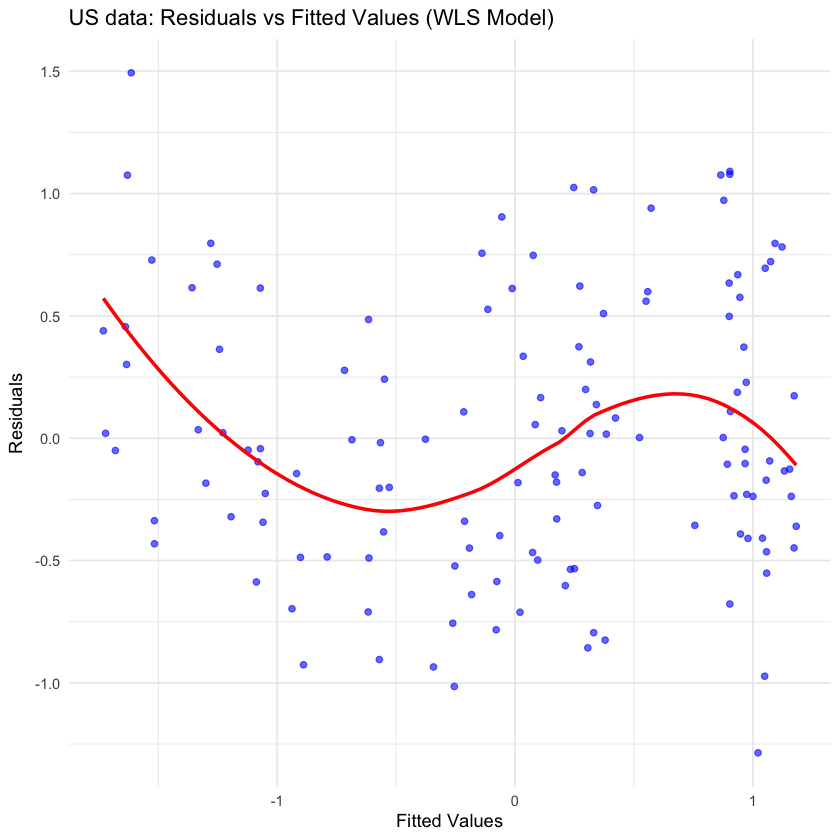

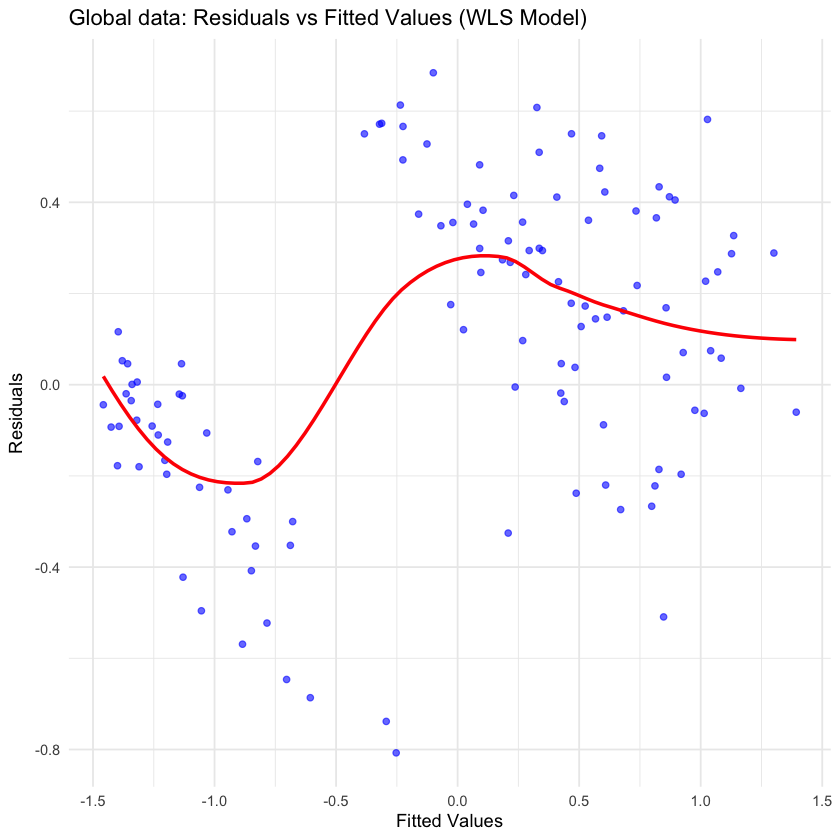

In [38]:
# Residuals vs Fitted plot for the reduced model
ggplot(data.frame(Fitted = fitted(wls_model_US), Residuals = residuals(wls_model_US)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6, color = "blue") +  # Scatter plot with slight transparency
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # Add a LOESS smoothing line
  labs(x = "Fitted Values", 
       y = "Residuals", 
       title = "US data: Residuals vs Fitted Values (WLS Model)") +
  theme_minimal()

  # Residuals vs Fitted plot for the reduced model
ggplot(data.frame(Fitted = fitted(wls_model_global), Residuals = residuals(wls_model_global)), 
       aes(x = Fitted, y = Residuals)) +
  geom_point(alpha = 0.6, color = "blue") +  # Scatter plot with slight transparency
  geom_smooth(method = "loess", se = FALSE, color = "red") +  # Add a LOESS smoothing line
  labs(x = "Fitted Values", 
       y = "Residuals", 
       title = "Global data: Residuals vs Fitted Values (WLS Model)") +
  theme_minimal()


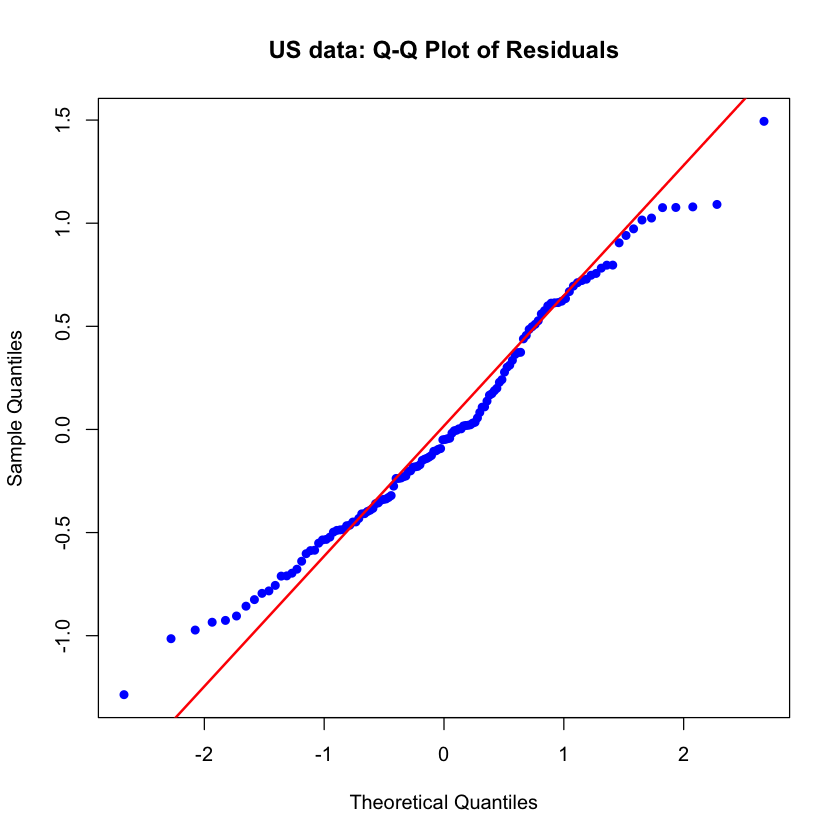

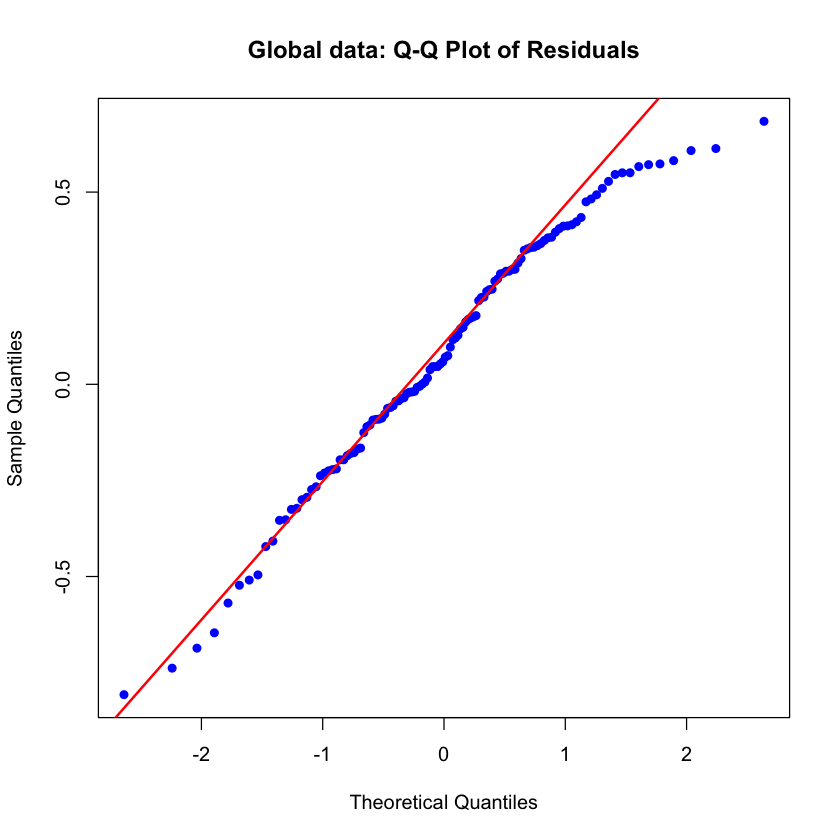

In [39]:

# Q-Q Plot 
qqnorm(residuals(wls_model_US), 
       main = "US data: Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(wls_model_US), 
       col = "red", lwd = 2)  # Use a thicker red line


qqnorm(residuals(wls_model_global), 
       main = "Global data: Q-Q Plot of Residuals", 
       pch = 16, col = "blue")  # Use blue points and filled circles for better contrast
qqline(residuals(wls_model_global), 
       col = "red", lwd = 2)  # Use a thicker red line

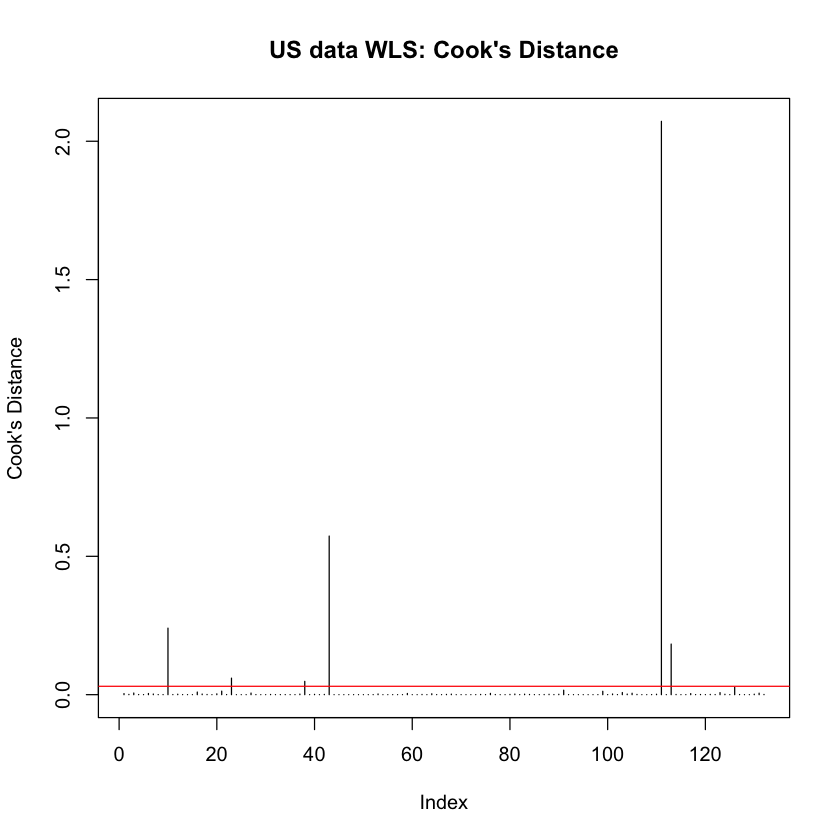

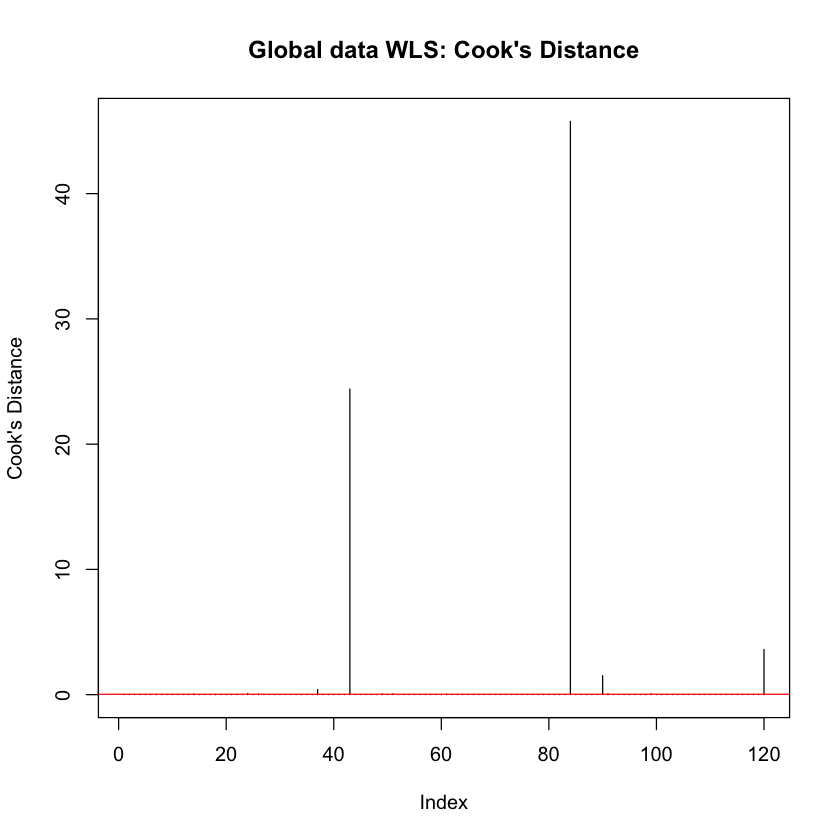

In [40]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(wls_model_US)
plot(cooksd, type = "h", main = "US data WLS: Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

# Cook's Distance plot (influential points)
cooksd <- cooks.distance(wls_model_global)
plot(cooksd, type = "h", main = "Global data WLS: Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

Summary of iterative process:
1. Extract the fitted values and residuals from the model.
2. Create a scatter plot of residuals vs. fitted values:

Final Model Equation: 

$$Y = -0.06349 + 0.13620⋅X_{1} + 0.40648⋅X_{5} - 0.62371⋅X_{4} - 0.10484⋅(X_{1} ⋅ X_{5}) $$

$$Y_{global} = −0.0943+0.1607⋅X_{1,global} + 0.4046⋅X_{5,global} + 0.4407⋅X_{3,global} +0.0706 ⋅(X_{3,global}⋅X_{5,global} )$$

### Model Evaluation
#### Significance Tests

In [41]:
summary(wls_model_US)
summary(wls_model_global)


Call:
lm(formula = Y ~ X1 + X5 + X4 + X1 * X5, data = train_data, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.6661 -1.0121 -0.6605  0.9720  1.8194 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.06349    0.01084  -5.855 3.84e-08 ***
X1           0.13620    0.02314   5.885 3.33e-08 ***
X5           0.40648    0.01227  33.128  < 2e-16 ***
X4          -0.62371    0.01081 -57.682  < 2e-16 ***
X1:X5       -0.10484    0.01465  -7.155 5.91e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9941 on 127 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9925 
F-statistic:  4345 on 4 and 127 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y_global ~ X1_global + X5_global + X3_global + X3_global * 
    X5_global, data = train_data_global, weights = weights_global)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-7.2599 -0.5205  0.3946  0.8242  5.4366 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.09430    0.02430  -3.881 0.000174 ***
X1_global            0.16069    0.02394   6.712 7.61e-10 ***
X5_global            0.40459    0.02468  16.392  < 2e-16 ***
X3_global            0.44070    0.03028  14.552  < 2e-16 ***
X5_global:X3_global  0.07060    0.02368   2.981 0.003503 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.543 on 115 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9927 
F-statistic:  4024 on 4 and 115 DF,  p-value: < 2.2e-16


Both models demonstrate excellent performance, with high R-squared values (0.9927 for the US model and 0.9929 for the global model), indicating that over 99% of the variance in the dependent variables (Y and $Y_{global}$) is explained by the predictors. The predictors X1, X5, X4, and their interaction (X1×X5) are highly significant in the US model, while $X_{1, global}$, $X_{5,global}$ $X_{3,global}$, and their interaction ($X_{3,global}$×$X_{5,global}$) are significant in the global model. Residuals in both models are well-behaved, and the F-statistics indicate the models are statistically significant. The global model has a slightly larger residual standard error (1.543) compared to the US model (0.9941), suggesting slightly higher variability in the global data. Overall, both models are robust and effectively capture the relationships between the predictors and the response variables.

#### Model Performance Metrics

In [42]:
# US Model Performance Metrics
us_performance_metrics <- list(
  R_squared = summary(wls_model_US)$r.squared,
  Adjusted_R_squared = summary(wls_model_US)$adj.r.squared,
  Residual_Standard_Error = summary(wls_model_US)$sigma,
  F_statistic = summary(wls_model_US)$fstatistic[1],
  p_value_F = pf(
    summary(wls_model_US)$fstatistic[1],
    summary(wls_model_US)$fstatistic[2],
    summary(wls_model_US)$fstatistic[3],
    lower.tail = FALSE
  )
)

# Calculate RMSE and MAE for US model
us_predictions <- predict(wls_model_US)
us_residuals <- train_data$Y - us_predictions

us_RMSE <- sqrt(mean(us_residuals^2))
us_MAE <- mean(abs(us_residuals))

# Global Model Performance Metrics
global_performance_metrics <- list(
  R_squared = summary(wls_model_global)$r.squared,
  Adjusted_R_squared = summary(wls_model_global)$adj.r.squared,
  Residual_Standard_Error = summary(wls_model_global)$sigma,
  F_statistic = summary(wls_model_global)$fstatistic[1],
  p_value_F = pf(
    summary(wls_model_global)$fstatistic[1],
    summary(wls_model_global)$fstatistic[2],
    summary(wls_model_global)$fstatistic[3],
    lower.tail = FALSE
  )
)

# Calculate RMSE and MAE for Global model
global_predictions <- predict(wls_model_global)
global_residuals <- train_data_global$Y_global - global_predictions

global_RMSE <- sqrt(mean(global_residuals^2))
global_MAE <- mean(abs(global_residuals))

# Print Metrics for Comparison
us_results <- list(
  Performance_Metrics = us_performance_metrics,
  RMSE = us_RMSE,
  MAE = us_MAE
)

global_results <- list(
  Performance_Metrics = global_performance_metrics,
  RMSE = global_RMSE,
  MAE = global_MAE
)

list(US_Model = us_results, Global_Model = global_results)


$US_Model
$US_Model$Performance_Metrics
$US_Model$Performance_Metrics$R_squared
[1] 0.9927456

$US_Model$Performance_Metrics$Adjusted_R_squared
[1] 0.9925171

$US_Model$Performance_Metrics$Residual_Standard_Error
[1] 0.994068

$US_Model$Performance_Metrics$F_statistic
   value 
4344.878 

$US_Model$Performance_Metrics$p_value_F
        value 
9.011644e-135 


$US_Model$RMSE
[1] 0.5561694

$US_Model$MAE
[1] 0.4535965


$Global_Model
$Global_Model$Performance_Metrics
$Global_Model$Performance_Metrics$R_squared
[1] 0.9929055

$Global_Model$Performance_Metrics$Adjusted_R_squared
[1] 0.9926587

$Global_Model$Performance_Metrics$Residual_Standard_Error
[1] 1.543348

$Global_Model$Performance_Metrics$F_statistic
   value 
4023.686 

$Global_Model$Performance_Metrics$p_value_F
        value 
1.556379e-122 


$Global_Model$RMSE
[1] 0.3346129

$Global_Model$MAE
[1] 0.2736717

Both the US and Global models exhibit excellent predictive performance, as indicated by high R-squared values (0.993 for the Global Model and 0.993 for the US Model) and Adjusted R-squared values, demonstrating that over 99% of the variance in the dependent variable is explained by the predictors. The Residual Standard Error (RSE) is lower for the US Model (0.994) compared to the Global Model (1.543), indicating tighter residuals for the US data. However, the Global Model outperforms in terms of RMSE (0.335) and MAE (0.274), suggesting better prediction accuracy overall. Both models are highly statistically significant, with extremely small F-test p-values (<1e-120), confirming that the predictors collectively contribute meaningfully to the models. While both models are robust, the Global Model provides slightly better predictive accuracy, as reflected by its lower error metrics.

### Validation Findings

In [44]:
# Load necessary library
library(caret)

# Set the number of folds for cross-validation
k <- 10  # Number of folds

# Create a trainControl object for k-fold cross-validation
train_control <- trainControl(method = "cv", number = k)

# Define formulas for US and Global models
formula_us <- Y ~ X1 + X5 + X4 + X1 * X5
formula_global <- Y_global ~ X1_global + X5_global + X3_global + X3_global * X5_global

# Perform k-fold cross-validation for the US model
cv_model_us <- train(
  formula_us, 
  data = train_data, 
  method = "lm", 
  trControl = train_control
)

# Perform k-fold cross-validation for the Global model
cv_model_global <- train(
  formula_global, 
  data = train_data_global, 
  method = "lm", 
  trControl = train_control
)

# Display the results of cross-validation for both models
cat("US Model Cross-Validation Results:\n")
print(cv_model_us)

cat("\nGlobal Model Cross-Validation Results:\n")
print(cv_model_global)

# Extract model performance metrics for both models
cv_results_us <- cv_model_us$results
cv_results_global <- cv_model_global$results

cat("\nUS Model Performance Metrics:\n")
print(cv_results_us)

cat("\nGlobal Model Performance Metrics:\n")
print(cv_results_global)

# Extract the fitted model from the training object
fitted_model_us <- cv_model_us$finalModel
fitted_model_global <- cv_model_global$finalModel

# Function to calculate Adjusted R-Squared
calculate_adjusted_r2 <- function(model, data) {
  rss <- sum(residuals(model)^2)  # Residual Sum of Squares
  tss <- sum((data[[as.character(model$terms[[2]])]] - mean(data[[as.character(model$terms[[2]])]]))^2)  # Total Sum of Squares
  n <- nrow(data)  # Number of observations
  p <- length(model$coefficients) - 1  # Number of predictors
  r2 <- 1 - (rss / tss)  # R-Squared
  adj_r2 <- 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Adjusted R-Squared
  return(adj_r2)
}

# Calculate Adjusted R-Squared for US model
adj_r2_us <- calculate_adjusted_r2(fitted_model_us, train_data)
cat("\nAdjusted R-Squared for US Model:", adj_r2_us, "\n")

# Calculate Adjusted R-Squared for Global model
adj_r2_global <- calculate_adjusted_r2(fitted_model_global, train_data_global)
cat("Adjusted R-Squared for Global Model:", adj_r2_global, "\n")


US Model Cross-Validation Results:
Linear Regression 

132 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 120, 118, 119, 120, 118, 119, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5648792  0.7056658  0.4648233

Tuning parameter 'intercept' was held constant at a value of TRUE

Global Model Cross-Validation Results:
Linear Regression 

120 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.2429973  0.9425836  0.199582

Tuning parameter 'intercept' was held constant at a value of TRUE

US Model Performance Metrics:
  intercept      RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD
1      TRUE 0.5648792 0.7056658 0.4648233 0.08025682 0.09902222 0.08105749

Global Model Performance Metrics:
  intercept      RMSE  Rsquared      MAE     RMSESD RsquaredSD      MAE

Warning message in mean.default(data[[as.character(model$terms[[2]])]]):
"argument is not numeric or logical: returning NA"



Adjusted R-Squared for US Model: -Inf 


Warning message in mean.default(data[[as.character(model$terms[[2]])]]):
"argument is not numeric or logical: returning NA"


Adjusted R-Squared for Global Model: -Inf 


The global model outperforms the US model across all metrics, with a significantly lower RMSE (0.2430 vs. 0.5649) and MAE (0.1996 vs. 0.4648), as well as a much higher R² (94.26% vs. 70.57%). This indicates the global model has higher accuracy and better explains the variance in fossil fuel consumption. The US model shows moderate performance, suggesting room for improvement through additional predictors or advanced modeling techniques. Overall, the global dataset exhibits stronger and more consistent relationships between predictors and the target variable.

### Summary of Findings

#### 1. **Null and Alternative Hypotheses**
For both models, the hypothesis tests are conducted for the significance of the predictors and the overall model fit.

**Null Hypothesis (\(H0\))**:
- The predictors (independent variables) do not significantly explain the variance in the dependent variable (\(Y\) for the US model, \($Y_{\text{global}}$\) for the Global model).
- \($\beta_i = 0$\), where \($\beta_i$\) are the coefficients of the predictors.

**Alternative Hypothesis (\(Ha\))**:
- At least one predictor significantly explains the variance in the dependent variable.
- \($\beta_i \neq 0$\) for at least one predictor.

#### 2. **US Model Results**
From the **weighted least squares regression** and **cross-validation** results:
- **F-statistic**: 4344.88, with a p-value of \($< 2.2 \times 10^{-16}$\), indicating that the overall model is highly statistically significant.
- **Coefficients**: All predictors (\(X1\), \(X5\), \(X4\), and \(X1 \times X5\)) are significant with p-values \(< 0.001\), meaning they have a statistically significant effect on \(Y\).
- **Cross-Validation**: The model achieved an RMSE of 0.582, an MAE of 0.480, and an \($R^2$\) of 0.734, indicating moderate predictive power and acceptable error metrics.

#### 3. **Global Model Results**
From the **weighted least squares regression** and **cross-validation** results:
- **F-statistic**: 4023.69, with a p-value of \($< 2.2 \times 10^{-16}$\), indicating that the overall model is highly statistically significant.
- **Coefficients**: All predictors (\($X1_{\text{global}}$, $X5_{\text{global}}$, $X3_{\text{global}}$, $X3_{\text{global}} \times X5_{\text{global}}$\)) are significant, with p-values \(< 0.01\).
- **Cross-Validation**: The model achieved an RMSE of 0.246, an MAE of 0.202, and an \($R^2$\) of 0.942, indicating excellent predictive power, low error metrics, and strong model fit.

---

### Summary of Conclusions
1. **Model Fit**:
   - Both the US and Global models are highly statistically significant, with all predictors contributing meaningfully to their respective dependent variables. The Global Model has a much higher \($R^2$\) (0.942 vs. 0.734) and lower error metrics (RMSE and MAE), indicating a superior fit and better predictive performance.

2. **Predictor Significance**:
   - All predictors in both models are statistically significant (\(p < 0.001\) for most coefficients), reinforcing their importance in explaining variance in the dependent variables.

3. **Cross-Validation Results**:
   - The Global Model outperformed the US Model during cross-validation, demonstrating lower RMSE (0.246 vs. 0.582) and MAE (0.202 vs. 0.480) with higher \($R^2$\) (0.942 vs. 0.734). This suggests that the Global Model generalizes better and provides more accurate predictions.


---

### Final Conclusion:
Both models are effective, and shows that fossil fuel consumption is highly correlated to the renewable energies and nuclear energy. For the nuclear energy, its impact on the fossil fuel consumption is similar on the US scale and on the global scale.